# Maching Learning - Logistic Regression

CS440/640


<br>      This code is about how to implement Logistic Regression                                                                      



In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

## Logistic Regression Model 


In [2]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim, hidden_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
            hiden_dim: hidden layer
        """
        
        self.theta = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.bias = np.zeros((1, hidden_dim))
        self.bias2 = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta) + self.bias
        #activation function - hyperbolic tangent
        a = np.tanh(z)
        z2 = np.dot(a,self.theta2) + self.bias2
        exp_z = np.exp(z2)
        #softmax_scores = exp_z / (exp_z + 1)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)

        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
    # implement logistic regression using gradient descent 
    #--------------------------------------------------------------------------
    def fit(self,X,y,num_epochs,alpha=0.01):
    
        #Learns model parameters to fit the data.
  

        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X,self.theta) + self.bias
            #activation function - hyperbolic tangent
            a = np.tanh(z)
            z2 = np.dot(a,self.theta2) + self.bias2
            exp_z = np.exp(z2)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
            #softmax_scores = exp_z / (exp_z + 1)
        
            # Backpropagation
            beta = np.zeros_like(softmax_scores)
            #print (softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta = softmax_scores - one_hot_y
            #print(beta)
            # Compute gradients of model parameters
            dtheta2 = np.dot(a.T, beta)
            dbias2 = np.sum(beta, axis=0)
            beta2= np.dot(beta, self.theta2.T) * (1-np.power(a,2))
            dtheta = np.dot(X.T,beta2)
            dbias = np.sum(beta2, axis=0)
    
            # Gradient descent parameter update
            self.theta -= alpha * dtheta
            self.bias -= alpha * dbias  
            self.theta2 -= alpha * dtheta2
            self.bias2 -= alpha * dbias2
        return 0

In [3]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

## Data Analysis Basics

In [4]:
#1. Load data
X = np.genfromtxt('DATA/data_LinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_LinearY.csv', delimiter=',').astype(np.int64)

def fold_i_of_k(dataset, i, k):
    n = len(dataset)
    return dataset[n*(i-1)//k:n*i//k]

    

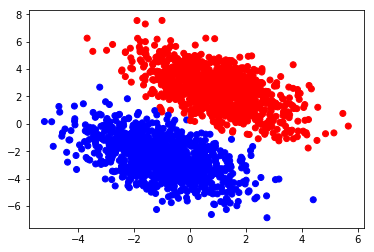

In [5]:
#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [6]:
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 10
logreg = LogisticRegression(input_dim, output_dim,hidden_dim)
logreg2 = LogisticRegression(input_dim, output_dim, hidden_dim)
logreg3 = LogisticRegression(input_dim, output_dim, hidden_dim)
logreg4 = LogisticRegression(input_dim, output_dim, hidden_dim)

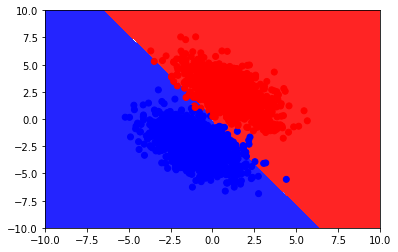

In [7]:
#4. Plot decision boundary
plot_decision_boundary(logreg, X, y)

## Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

In [8]:
#5. Train the model
#5-fold round robin cross validation
total = 0
for i in range(1,6):
    xtest = fold_i_of_k(X,i,5)
    ytest = fold_i_of_k(y,i,5)
    listz=[]
    for z in [x for x in range(1,6) if x != i]:
        listz.append(z)
    
    xfold= np.append(fold_i_of_k(X,listz[0],5) ,fold_i_of_k(X, listz[1], 5),axis=0)
    x2fold= np.append(fold_i_of_k(X,listz[2],5), fold_i_of_k(X,listz[3],5), axis=0)
    yfold= np.append(fold_i_of_k(y,listz[0],5) ,fold_i_of_k(y, listz[1], 5),axis=0)
    y2fold= np.append(fold_i_of_k(y,listz[2],5), fold_i_of_k(y,listz[3],5), axis=0)
    x3fold = np.append(xfold,x2fold,axis=0)
    y3fold = np.append(yfold,y2fold,axis=0)
   
    #evaluating
    #accuracy weird
    acc = 0
    y_pred = logreg.predict(xtest)
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y[i]] += 1
        if y[i] == y_pred[i]:
            acc += 1
    acc = acc/len(y_pred)
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)
    total += acc

total= total/5
print(total)
#plot the average
#logreg.fit(X,y,2000,alpha=0.001)
#plot_decision_boundary(logreg, X, y)

ACCURACY:  0.985
CONFUSION MATRIX: 
 [[ 198.    1.]
 [   5.  196.]]
ACCURACY:  0.495
CONFUSION MATRIX: 
 [[ 101.  100.]
 [ 102.   97.]]
ACCURACY:  0.485
CONFUSION MATRIX: 
 [[  99.  102.]
 [ 104.   95.]]
ACCURACY:  0.5225
CONFUSION MATRIX: 
 [[ 101.   89.]
 [ 102.  108.]]
ACCURACY:  0.4825
CONFUSION MATRIX: 
 [[  98.  102.]
 [ 105.   95.]]
0.594


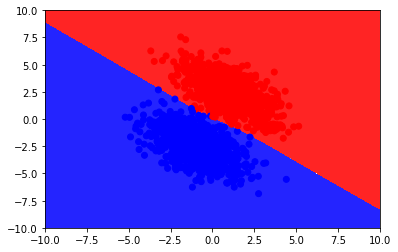

In [9]:
#6. Plot decision boundary after trainning
#plot_decision_boundary(logreg, X, y)
logreg.fit(x3fold,y3fold,2000,alpha=0.001)
plot_decision_boundary(logreg, x3fold, y3fold)

#logreg2.fit(x3fold,y3fold,2000,alpha=0.01)
#plot_decision_boundary(logreg2, x3fold, y3fold)
#logreg3.fit(x3fold,y3fold,2000,alpha=0.05)
#plot_decision_boundary(logreg3, x3fold, y3fold)
#logreg4.fit(x3fold,y3fold,2000,alpha=0.005)
#plot_decision_boundary(logreg4, x3fold, y3fold)



## Model Evaluation

In [10]:
#7. ompute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.999
CONFUSION MATRIX: 
 [[ 999.    1.]
 [   1.  999.]]


In [11]:
#Accuracy and confusion Matrix for 5 cross validation
acc = 0
y_pred = logreg.predict(xtest)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y3fold[i]] += 1
    if y3fold[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)


print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.4925
CONFUSION MATRIX: 
 [[ 101.  101.]
 [ 102.   96.]]
